In [ ]:
#Analysing the sentiment on songs that has released durin COVID-19 using en-sentiment pre-trained moedel
#importing all recquired packages
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report
from keras.layers import Embedding, Flatten, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout




In [ ]:
df = pd.read_csv('spotify_songs_sample.csv')
#df = pd.read_csv('/content/drive/MyDrive/spotify_songs_sample.csv')

In [ ]:

df = df[['lyrics','track_album_release_date']]

print(df.columns)

Index(['lyrics', 'track_album_release_date'], dtype='object')


In [ ]:
# changing the name of 'track_album_release_date' to 'year'
df.rename(columns={'track_album_release_date': 'year'}, inplace=True)

In [ ]:
import re

date_pattern = r'^\d{1,2}/\d{1,2}/\d{4}$'
year_pattern = r'^\d{4}$'

def format_date(date_str):
    if re.match(date_pattern, date_str):
        return date_str[-4:]
    elif re.match(year_pattern, date_str):
        return date_str
    else:
        return None

In [ ]:
df['year'] = df['year'].apply(format_date)

In [ ]:
# Droping rows with null values in the 'lyrics' column
df = df.dropna(subset=['lyrics'])

In [ ]:
# Droping rows with null values in the 'lyrics' column
df = df.dropna(subset=['valence'])

In [ ]:
# Droping rows with null values in the 'lyrics' column
df = df.dropna(subset=['year'])

In [ ]:
df['year'] = df['year'].astype(int)

In [ ]:
# Filtering the dataset to include only songs released during or after 2019
df = df[df['year'] >= 2019]

In [ ]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import nltk
nltk.download('wordnet')

import nltk
nltk.download('omw-1.4')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import string
def preprocess_text(text):
    if text is None or text != text or text.strip() == "":
        return ""
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    #
    text = re.sub(r"[^a-zA-Z]+", " ", text)
    # Tokenization
    text = nltk.word_tokenize(text.lower())
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    # Lemmatization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return " ".join(text)

df['lyrics'] = df['lyrics'].apply(lambda x: preprocess_text(x))

In [ ]:
#!pip install flair
import flair
import pandas as pd
import matplotlib.pyplot as plt
from flair.data import Sentence
from flair.models import TextClassifier


In [ ]:




classifier = TextClassifier.load('en-sentiment')

def get_emotion(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    emotion = sentence.labels[0].value
    return emotion


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 51.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 62.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 57.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.1 MB/s eta 0:00:0

2023-05-16 20:08:19,181 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpllt63fna


100%|██████████| 253M/253M [00:11<00:00, 24.0MB/s]

2023-05-16 20:08:30,583 copying /tmp/tmpllt63fna to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-05-16 20:08:31,244 removing temp file /tmp/tmpllt63fna


In [ ]:
# droping rows with empty strings
df = df.dropna(subset=['lyrics'])

In [ ]:
# finding rows with empty lyrics
empty_strings = df[df['lyrics'].str.strip().eq('')]

# droping rows with empty lyrics
df.drop(empty_strings.index, inplace=True)

In [ ]:
empty_strings = df[df['lyrics'].str.strip().eq('')]
print(empty_strings)


Empty DataFrame
Columns: [lyrics, year]
Index: []


In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=5c5672221b39dd72c0463808540ca4c2ea09b5cff6a82c9c4171b21b6e18664b
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
# Applying the function to the lyrics column and create a new column for the sentiments
import emoji
df['emotion'] = df['lyrics'].apply(get_emotion)

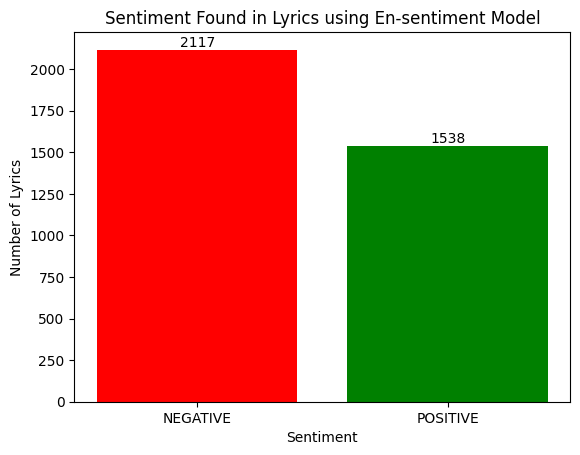

In [ ]:
# Counting the number of lyrics for each emotion
emotion_count = df['emotion'].value_counts()

# Creating a color map for the bars
colors = ['green' if emotion == 'POSITIVE' else 'red' if emotion == 'NEGATIVE' else 'blue' for emotion in emotion_count.index]

# Ploting a bar chart of the emotions found
plt.bar(emotion_count.index, emotion_count.values, color=colors)

# Adding the count on top of the bars
for i, value in enumerate(emotion_count.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title('Sentiment Found in Lyrics using En-sentiment Model')
plt.xlabel('Sentiment')
plt.ylabel('Number of Lyrics')
plt.show()
